# Training SVM models on the Russian Nuclear Threat News Coverage

## Importing necessary libraries and depencies

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import LinearSVC
from sklearn import metrics
from sklearn.utils import resample



## Sources used:

- https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
- https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

## Training on dataset-full.csv

In [23]:
df = pd.read_csv('datasets/dataset-full.csv' , lineterminator='\n')
df.head()

,date,text,side,label
0,2022-01-27,Medvedev sees no need to review Russia’s nucle...,r,W
1,2022-01-27,/TASS/.,r,W
2,2022-01-27,There is no need to review Russia’s nuclear do...,r,W
3,2022-01-27,"""As for reviewing the nuclear doctrine, I don’...",r,W
4,2022-01-27,Medvedev explained that all the necessary aspe...,r,W


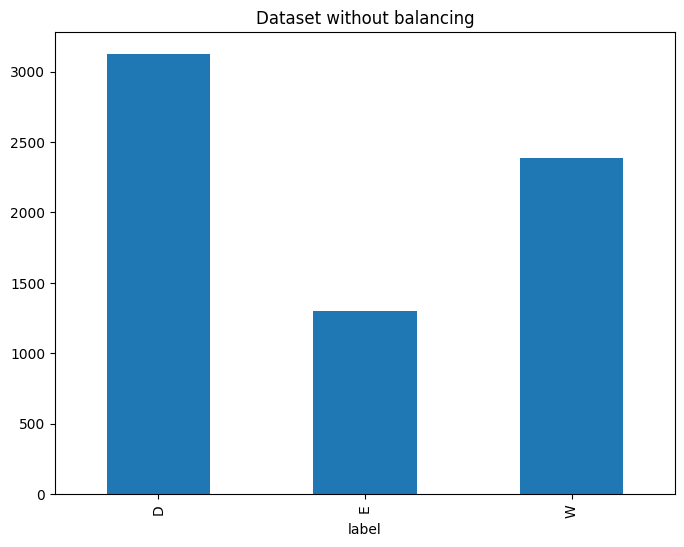

In [67]:
fig = plt.figure(figsize=(8,6))
df.groupby('label')['text'].count().plot.bar(ylim=0)
plt.title("Dataset without balancing")
plt.show()

In [31]:
#create two different dataframe of majority and minority class 
df_majority = df[(df['label']=='W')] 
df_minority = df[(df['label']=='E')] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= df_majority.shape[0], # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

# downsample majority class
df_bal = resample(df[(df['label']=='D')], 
                                 replace=True,    # sample with replacement
                                 n_samples= df_upsampled[df_upsampled['label']=='E'].shape[0], # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_bal, df_upsampled])


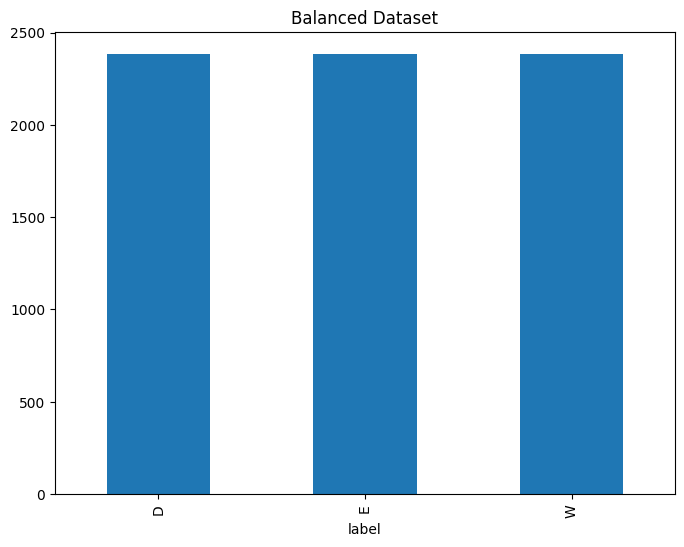

In [66]:
fig = plt.figure(figsize=(8,6))
df_balanced.groupby('label')['text'].count().plot.bar(ylim=0)
plt.title("Balanced Dataset")
plt.show()

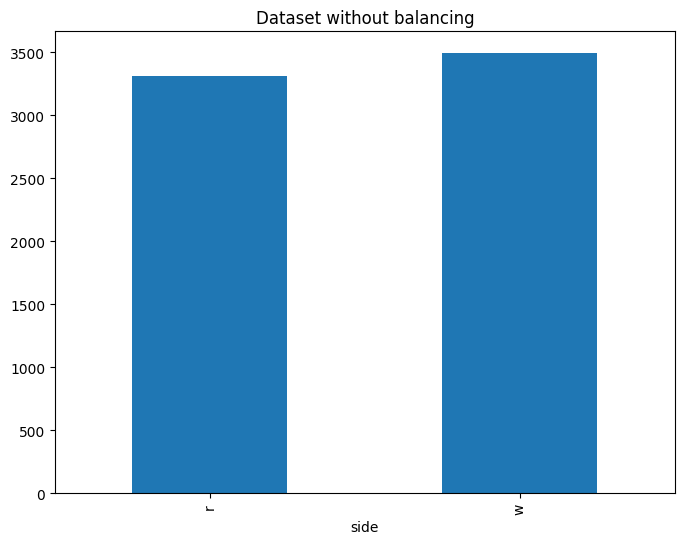

In [68]:
fig = plt.figure(figsize=(8,6))
df.groupby('side')['text'].count().plot.bar(ylim=0)
plt.title("Dataset without balancing")
plt.show()

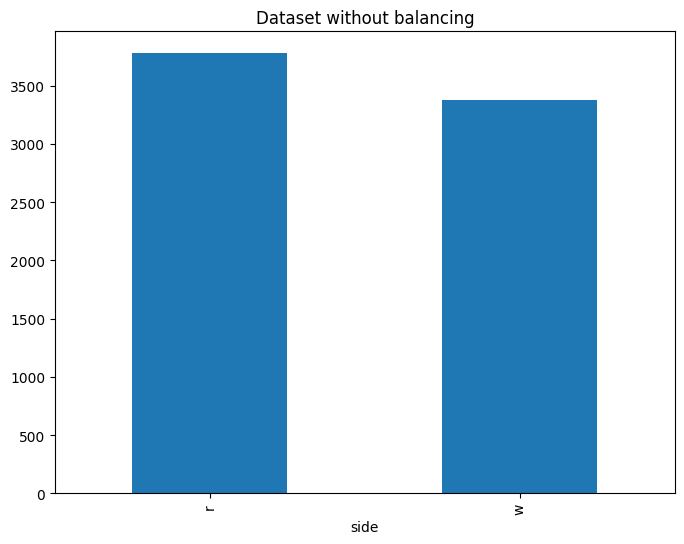

In [83]:
fig = plt.figure(figsize=(8,6))
df_balanced.groupby('side')['text'].count().plot.bar(ylim=0)
plt.title("Dataset without balancing")
plt.show()

In [41]:
df_balanced.shape

(7152, 4)

### Training an SVM model on 'label' (imbalanced dataset)

In [49]:
# Training to predict labels on imbalanced dataset

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df['text']).toarray()
labels = df['label']
side = df['side']
features.shape


model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=labels.unique()))


              precision    recall  f1-score   support

           W       0.63      0.68      0.65       636
           E       0.49      0.38      0.43       263
           D       0.55      0.56      0.56       463

    accuracy                           0.58      1362
   macro avg       0.56      0.54      0.55      1362
weighted avg       0.58      0.58      0.58      1362



### Training an SVM model on 'label'  (balanced dataset)

In [71]:
# Training to predict labels on the balanced dataset

# TF-IDF for label

tfidf_bal = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features_bal = tfidf_bal.fit_transform(df_balanced['text']).toarray()
labels_bal = df_balanced['label']
side_bal = df_balanced['side']
features_bal.shape

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_bal, labels_bal, df_balanced.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=labels_bal.unique()))



              precision    recall  f1-score   support

           D       0.68      0.71      0.69       467
           E       0.76      0.81      0.78       497
           W       0.70      0.61      0.65       467

    accuracy                           0.71      1431
   macro avg       0.71      0.71      0.71      1431
weighted avg       0.71      0.71      0.71      1431



### Training an SVM model on 'side' (imbalanced dataset)

In [8]:
# Training to predict sides on imbalanced dataset

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, side, df.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=side.unique()))


              precision    recall  f1-score   support

           r       0.79      0.78      0.78       665
           w       0.79      0.80      0.80       697

    accuracy                           0.79      1362
   macro avg       0.79      0.79      0.79      1362
weighted avg       0.79      0.79      0.79      1362



### Training an SVM model on 'side' (balanced dataset)

In [72]:
# Training to predict sides on balanced dataset

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_bal, side_bal, df_balanced.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=side_bal.unique()))



              precision    recall  f1-score   support

           r       0.87      0.89      0.88       746
           w       0.88      0.86      0.87       685

    accuracy                           0.87      1431
   macro avg       0.88      0.87      0.87      1431
weighted avg       0.87      0.87      0.87      1431



## Training on dataset-medium.csv

In [50]:
df_med = pd.read_csv('datasets/dataset-medium.csv' , lineterminator='\n')
df_med.head()

,date,text,side,label
0,2022-01-27 00:00:00,"A month before the invasion, the Russian leade...",r,W
1,2022-01-27 00:00:00,"Dmitry\r Medvedev, the Deputy Chairman of the ...",r,W
2,2022-01-27 00:00:00,Moscow had “the right” to use strategic nuclea...,r,W
3,2022-01-27 00:00:00,This was “a\r comprehensive formula” that made...,r,W
4,2022-02-07 00:00:00,"Ten days later, Putin continued developing the...",r,E


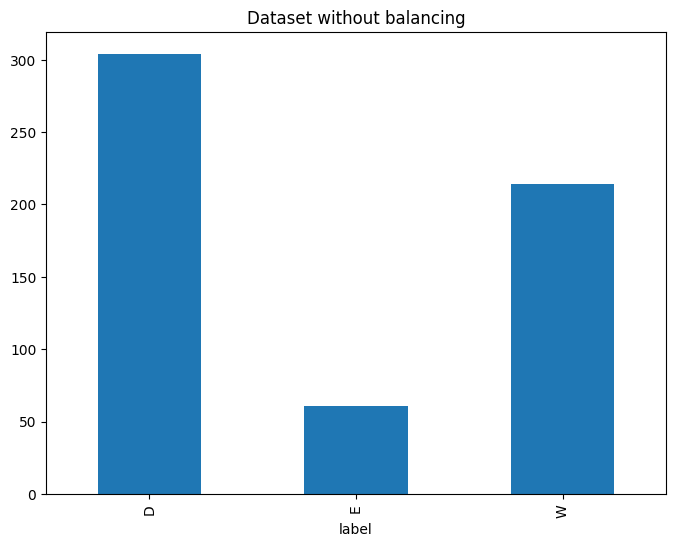

In [73]:
fig = plt.figure(figsize=(8,6))
df_med.groupby('label')['text'].count().plot.bar(ylim=0)
plt.title("Dataset without balancing")
plt.show()

In [74]:
#create two different dataframe of majority and minority class 
df_majority_med = df_med[(df_med['label']=='W')] 
df_minority_med = df_med[(df_med['label']=='E')] 
# upsample minority class
df_minority_upsampled_med = resample(df_minority_med, 
                                 replace=True,    # sample with replacement
                                 n_samples= df_majority_med.shape[0], # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled_med = pd.concat([df_minority_upsampled_med, df_majority_med])

# downsample majority class
df_bal_med = resample(df_med[(df_med['label']=='D')], 
                                 replace=True,    # sample with replacement
                                 n_samples= df_upsampled_med[df_upsampled_med['label']=='E'].shape[0], # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_balanced_med = pd.concat([df_bal_med, df_upsampled_med])



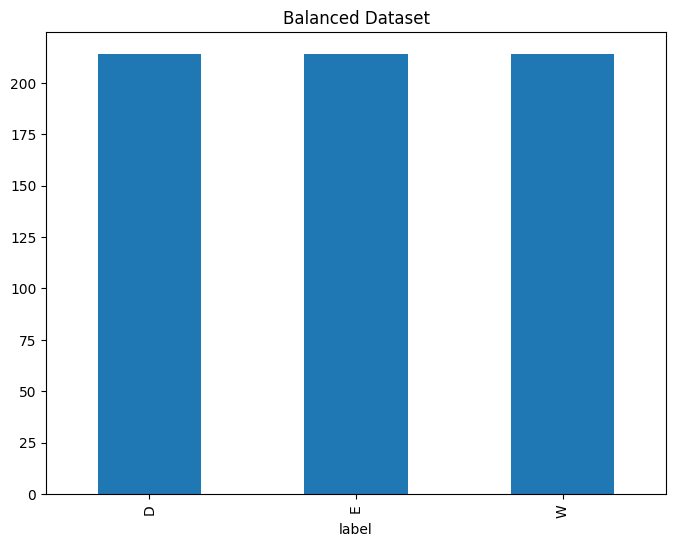

In [75]:
fig = plt.figure(figsize=(8,6))
df_balanced_med.groupby('label')['text'].count().plot.bar(ylim=0)
plt.title("Balanced Dataset")
plt.show()

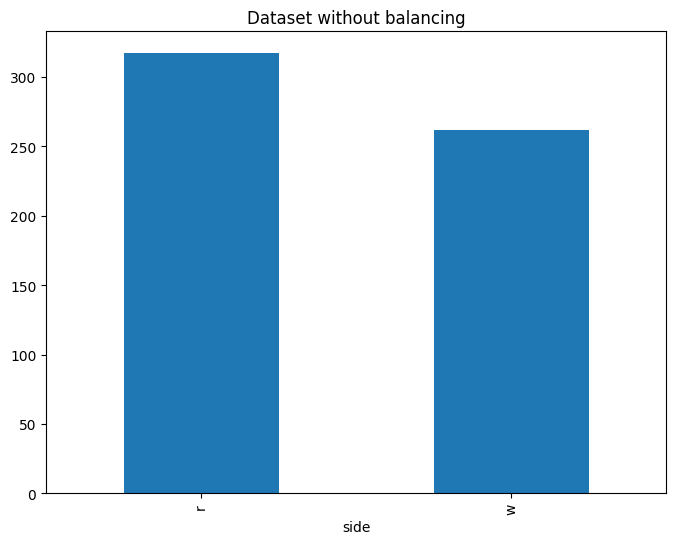

In [81]:
fig = plt.figure(figsize=(8,6))
df_med.groupby('side')['text'].count().plot.bar(ylim=0)
plt.title("Dataset without balancing")
plt.show()

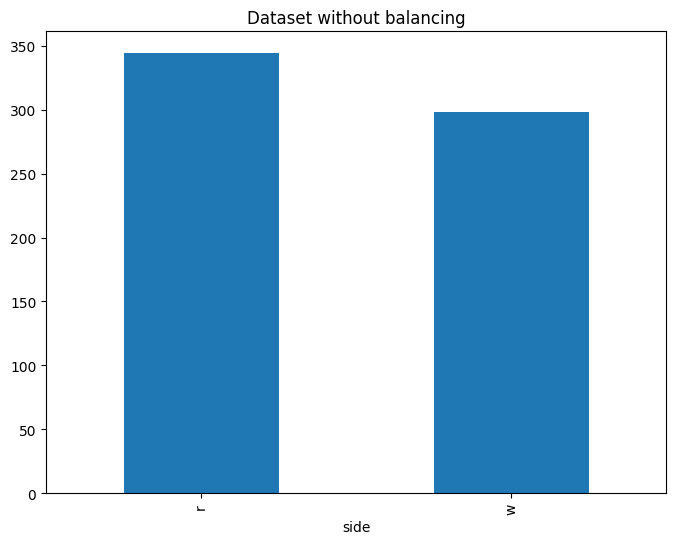

In [82]:
fig = plt.figure(figsize=(8,6))
df_balanced_med.groupby('side')['text'].count().plot.bar(ylim=0)
plt.title("Dataset without balancing")
plt.show()

### Training an SVM model on 'label' (imbalanced dataset)

In [77]:
# TF-IDF for imbalanced dataset

tfidf_med = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features_med = tfidf.fit_transform(df_med['text']).toarray()
labels_med = df_med['label']
side_med = df_med['side']
features_med.shape


(579, 327)

In [78]:
# Training to predict labels on imbalanced dataset

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_med, labels_med, df_med.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=labels.unique()))


              precision    recall  f1-score   support

           W       0.58      0.70      0.63        66
           E       0.17      0.10      0.12        10
           D       0.39      0.30      0.34        40

    accuracy                           0.51       116
   macro avg       0.38      0.37      0.37       116
weighted avg       0.48      0.51      0.49       116



### Training to train an SVM model on 'side' (imbalanced dataset)

In [79]:
# Training to predict sides on imbalanced dataset

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_med, side_med, df_med.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=side.unique()))


              precision    recall  f1-score   support

           r       0.76      0.81      0.79        64
           w       0.75      0.69      0.72        52

    accuracy                           0.76       116
   macro avg       0.76      0.75      0.75       116
weighted avg       0.76      0.76      0.76       116



### Training an SVM model on 'label' (balanced dataset)

In [84]:
# Training to predict labels on balanced dataset
# TF-IDF for imbalanced dataset

tfidf_med_bal = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features_med_bal = tfidf.fit_transform(df_balanced_med['text']).toarray()
labels_med_bal = df_balanced_med['label']
side_med_bal = df_balanced_med['side']
features_med_bal.shape



model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_med_bal, labels_med_bal, df_balanced_med.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=labels_med_bal.unique()))


              precision    recall  f1-score   support

           D       0.69      0.60      0.64        42
           E       0.80      0.95      0.87        39
           W       0.66      0.65      0.65        48

    accuracy                           0.72       129
   macro avg       0.72      0.73      0.72       129
weighted avg       0.71      0.72      0.71       129



### Training an SVM model on 'side' (balanced dataset)

In [85]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_med_bal, side_med_bal, df_balanced_med.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=side_med_bal.unique()))


              precision    recall  f1-score   support

           r       0.80      0.88      0.83        72
           w       0.82      0.72      0.77        57

    accuracy                           0.81       129
   macro avg       0.81      0.80      0.80       129
weighted avg       0.81      0.81      0.80       129



## Training on dataset-short.csv

In [91]:
df_s = pd.read_csv('datasets/dataset-short.csv' , lineterminator='\n')
df_s.head()

,date,text,side,label
0,2022-01-27 00:00:00,Medvedev: Russia has “the right” to use nuclea...,r,W
1,2022-02-07 00:00:00,Putin: If Ukraine attempts to take back Crimea...,r,E
2,2022-02-19 00:00:00,"Yearly nuclear exercise, normally held in autumn.",r,W
3,2022-02-22 00:00:00,Putin: Ukraine is seeking to acquire tactical ...,r,W
4,2022-02-24 00:00:00,Putin: Whoever tries to hinder Russia will fac...,r,E


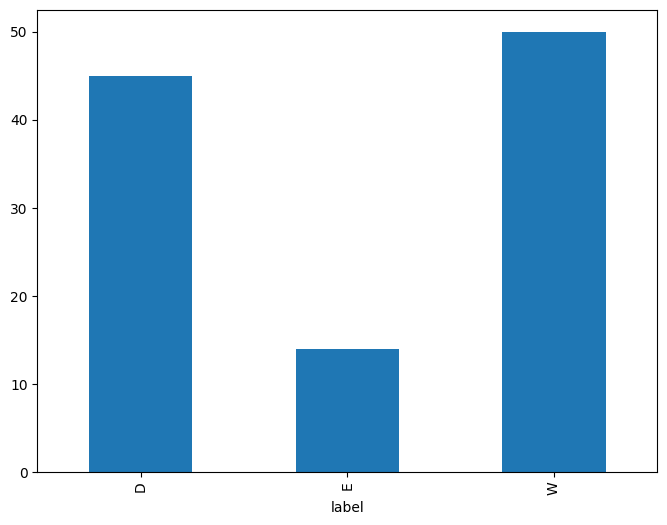

In [92]:
fig = plt.figure(figsize=(8,6))
df_s.groupby('label')['text'].count().plot.bar(ylim=0)
plt.show()

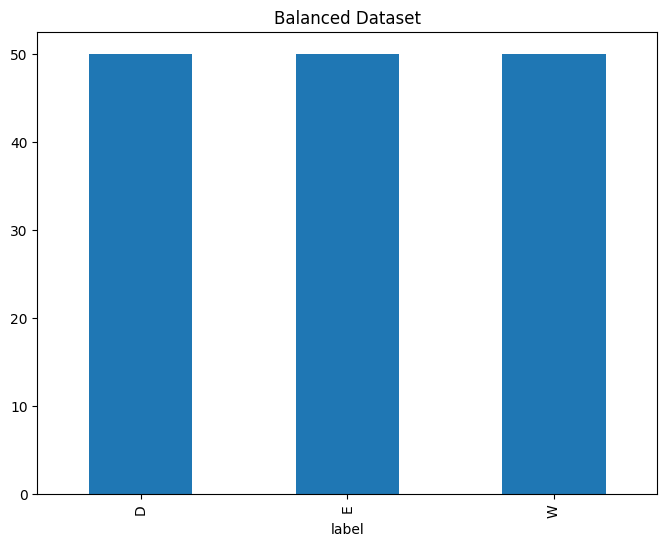

In [98]:
#create two different dataframe of majority and minority class 
df_majority_s = df_s[(df_s['label']=='W')] 
df_minority_s = df_s[(df_s['label']=='E')] 
# upsample minority class
df_minority_upsampled_s = resample(df_minority_s, 
                                 replace=True,    # sample with replacement
                                 n_samples= df_majority_s.shape[0], # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled_s = pd.concat([df_minority_upsampled_s, df_majority_s])

# upsample minority class
df_bal_s = resample(df_s[(df_s['label']=='D')], 
                                 replace=True,    # sample with replacement
                                 n_samples= df_upsampled_s[df_upsampled_s['label']=='E'].shape[0], # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_balanced_s = pd.concat([df_bal_s, df_upsampled_s])

fig = plt.figure(figsize=(8,6))
df_balanced_s.groupby('label')['text'].count().plot.bar(ylim=0)
plt.title("Balanced Dataset")
plt.show()


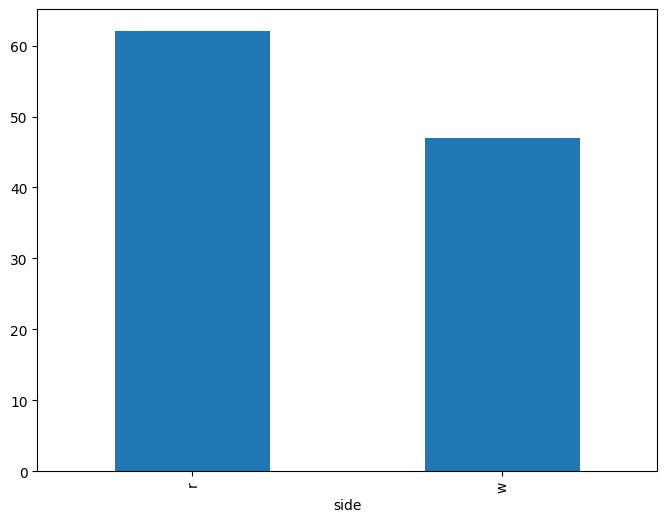

In [99]:
fig = plt.figure(figsize=(8,6))
df_s.groupby('side')['text'].count().plot.bar(ylim=0)
plt.show()

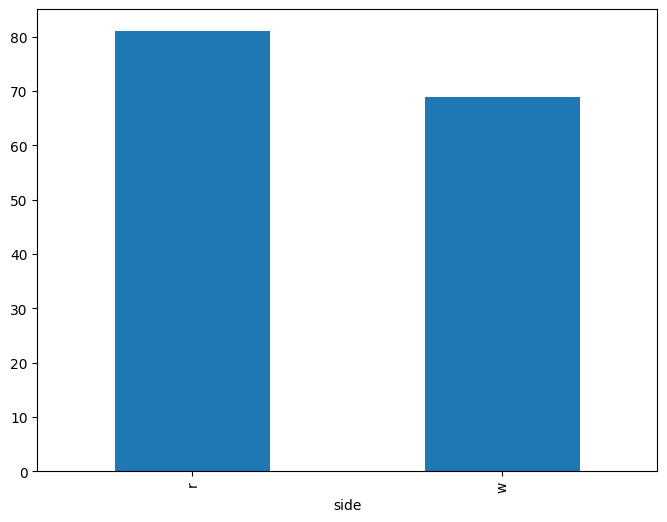

In [100]:
fig = plt.figure(figsize=(8,6))
df_balanced_s.groupby('side')['text'].count().plot.bar(ylim=0)
plt.show()

### Training an SVM on 'side' (imbalanced dataset)

In [102]:
# TF-IDF for label

tfidf_s = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features_s = tfidf_s.fit_transform(df_s['text']).toarray()
labels_s = df_s['label']
side_s = df_s['side']
features_s.shape

# Training to predict labels

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_s, labels_s, df_s.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=labels_s.unique()))



              precision    recall  f1-score   support

           W       0.50      0.60      0.55        10
           E       0.00      0.00      0.00         2
           D       0.50      0.50      0.50        10

    accuracy                           0.50        22
   macro avg       0.33      0.37      0.35        22
weighted avg       0.45      0.50      0.48        22



/Users/roman_sv/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/roman_sv/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/roman_sv/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

### Training an SVM on 'side' (imbalanced dataset)

In [104]:
# Training to predict labels

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_s, side_s, df_s.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=side_s.unique()))


              precision    recall  f1-score   support

           r       0.73      0.73      0.73        15
           w       0.43      0.43      0.43         7

    accuracy                           0.64        22
   macro avg       0.58      0.58      0.58        22
weighted avg       0.64      0.64      0.64        22



### Training an SVM on 'label' (balanced dataset)

In [105]:
# TF-IDF for label

tfidf_s_bal = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features_s_bal = tfidf_s.fit_transform(df_balanced_s['text']).toarray()
labels_s_bal = df_balanced_s['label']
side_s_bal = df_balanced_s['side']
features_s_bal.shape

# Training to predict labels

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_s_bal, labels_s_bal, df_balanced_s.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=labels_s_bal.unique()))



              precision    recall  f1-score   support

           D       0.57      0.73      0.64        11
           E       0.90      0.69      0.78        13
           W       0.33      0.33      0.33         6

    accuracy                           0.63        30
   macro avg       0.60      0.58      0.59        30
weighted avg       0.67      0.63      0.64        30



### Training an SVM on 'side' (balanced dataset)

In [107]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_s_bal, side_s_bal, df_balanced_s.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=side_s_bal.unique()))


              precision    recall  f1-score   support

           r       0.94      0.88      0.91        17
           w       0.86      0.92      0.89        13

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

